#Task 1


#part a


In [6]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib.colors import Normalize
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA



In [7]:
import requests
from io import StringIO
orig_url='https://drive.google.com/file/d/1b67gIURmd06jQA1nKoa1Dh-_P1pHfaIW/view?usp=sharing'

file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
data = pd.read_csv(csv_raw)

In [8]:
print(data)

      id   DGN  PRE4  PRE5  PRE6 PRE7  ... PRE19 PRE25 PRE30 PRE32 AGE Risk1Yr
0      1  DGN2  2.88  2.16  PRZ1    F  ...     F     F     T     F  60       F
1      2  DGN3  3.40  1.88  PRZ0    F  ...     F     F     T     F  51       F
2      3  DGN3  2.76  2.08  PRZ1    F  ...     F     F     T     F  59       F
3      4  DGN3  3.68  3.04  PRZ0    F  ...     F     F     F     F  54       F
4      5  DGN3  2.44  0.96  PRZ2    F  ...     F     F     T     F  73       T
..   ...   ...   ...   ...   ...  ...  ...   ...   ...   ...   ...  ..     ...
465  466  DGN2  3.88  2.12  PRZ1    F  ...     F     F     T     F  63       F
466  467  DGN3  3.76  3.12  PRZ0    F  ...     F     F     T     F  61       F
467  468  DGN3  3.04  2.08  PRZ1    F  ...     F     F     F     F  52       F
468  469  DGN3  1.96  1.68  PRZ1    F  ...     F     F     T     F  79       F
469  470  DGN3  4.72  3.56  PRZ0    F  ...     F     F     T     F  51       F

[470 rows x 18 columns]


In [9]:
data=data.drop('id', axis=1)
data.head(5)

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,DGN2,2.88,2.16,PRZ1,F,F,F,T,T,OC14,F,F,F,T,F,60,F
1,DGN3,3.40,1.88,PRZ0,F,F,F,F,F,OC12,F,F,F,T,F,51,F
2,DGN3,2.76,2.08,PRZ1,F,F,F,T,F,OC11,F,F,F,T,F,59,F
3,DGN3,3.68,3.04,PRZ0,F,F,F,F,F,OC11,F,F,F,F,F,54,F
4,DGN3,2.44,0.96,PRZ2,F,T,F,T,T,OC11,F,F,F,T,F,73,T


In [10]:
data.describe

<bound method NDFrame.describe of       DGN  PRE4  PRE5  PRE6 PRE7 PRE8  ... PRE19 PRE25 PRE30 PRE32 AGE Risk1Yr
0    DGN2  2.88  2.16  PRZ1    F    F  ...     F     F     T     F  60       F
1    DGN3  3.40  1.88  PRZ0    F    F  ...     F     F     T     F  51       F
2    DGN3  2.76  2.08  PRZ1    F    F  ...     F     F     T     F  59       F
3    DGN3  3.68  3.04  PRZ0    F    F  ...     F     F     F     F  54       F
4    DGN3  2.44  0.96  PRZ2    F    T  ...     F     F     T     F  73       T
..    ...   ...   ...   ...  ...  ...  ...   ...   ...   ...   ...  ..     ...
465  DGN2  3.88  2.12  PRZ1    F    F  ...     F     F     T     F  63       F
466  DGN3  3.76  3.12  PRZ0    F    F  ...     F     F     T     F  61       F
467  DGN3  3.04  2.08  PRZ1    F    F  ...     F     F     F     F  52       F
468  DGN3  1.96  1.68  PRZ1    F    F  ...     F     F     T     F  79       F
469  DGN3  4.72  3.56  PRZ0    F    F  ...     F     F     T     F  51       F

[470 rows x 17 co

In [11]:
data[['PRE7', 'PRE8', 'PRE9', 'PRE10', 'PRE11', 'PRE17', 'PRE19', 'PRE25', 'PRE30', 'PRE32', 'Risk1Yr']] = \
(data[['PRE7', 'PRE8', 'PRE9', 'PRE10', 'PRE11', 'PRE17', 'PRE19', 'PRE25', 'PRE30', 'PRE32', 'Risk1Yr']] == 'T').astype(int)
data['DGN']   = data['DGN'].str[-1:].astype(int)
data['PRE6']  = data['PRE6'].str[-1:].astype(int)
data['PRE14'] = data['PRE14'].str[-1:].astype(int)

In [12]:
data.head(5)

,DGN,PRE4,PRE5,PRE6,PRE7,PRE8,PRE9,PRE10,PRE11,PRE14,PRE17,PRE19,PRE25,PRE30,PRE32,AGE,Risk1Yr
0,2,2.88,2.16,1,0,0,0,1,1,4,0,0,0,1,0,60,0
1,3,3.40,1.88,0,0,0,0,0,0,2,0,0,0,1,0,51,0
2,3,2.76,2.08,1,0,0,0,1,0,1,0,0,0,1,0,59,0
3,3,3.68,3.04,0,0,0,0,0,0,1,0,0,0,0,0,54,0
4,3,2.44,0.96,2,0,1,0,1,1,1,0,0,0,1,0,73,1


In [13]:
from sklearn.model_selection import train_test_split 
# Feature selection -- To be implemented later on
X = data.drop('Risk1Yr', axis=1) 

y = data.Risk1Yr 
# Splitting into train sets and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=107) 
                                                    

In [14]:
from sklearn import metrics
clflinear = SVC(kernel = 'linear',C=10,gamma=0.0001)
#Train the model using the training sets
clflinear.fit(x_train, y_train)
#Predict the response for test dataset
y_pred = clflinear.predict(x_train)
y_pred1 = clflinear.predict(x_test)
# Model Accuracy: how often is the classifier correct?
print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred1))
                    

Test Accuracy: 0.8404255319148937


In [15]:
clfpoly = SVC(kernel = 'poly',degree=2,gamma=1,C=10)
#Train the model using the training sets
clfpoly.fit(x_train, y_train)
#Predict the response for test dataset
y_pred = clfpoly.predict(x_train)
y_pred1 = clfpoly.predict(x_test)
# Model Accuracy: how often is the classifier correct?
print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred1))
                    

Test Accuracy: 0.8191489361702128


In [17]:
clfrbf = SVC(kernel = 'rbf',C=100,gamma=0.0001)
#Train the model using the training sets

clfrbf.fit(x_train, y_train)
#Predict the response for test dataset
y_pred = clfrbf.predict(x_train)
y_pred1 = clfrbf.predict(x_test)
# Model Accuracy: how often is the classifier correct?
print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred1))
                    

Test Accuracy: 0.8404255319148937


##Part b

In [18]:
from sklearn.metrics import f1_score, fbeta_score, make_scorer ,accuracy_score
ftwo_scorer=  make_scorer(fbeta_score, average='micro', beta=1)

param_grid={
            'kernel': ['linear'],
            'C': [0.01,0.1, 1, 10, 100, 1000,10000],
             }
classifier=SVC()

model=GridSearchCV(estimator=classifier, param_grid=param_grid, scoring=ftwo_scorer,verbose=10, n_jobs=4, cv=5)

model.fit(x_train, y_train)
print("Best score: %0.3f" % model.best_score_)
print("Best Parameters set:")
best_parameters=model.best_estimator_.get_params()

for param_name in sorted(param_grid.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))
#for train set accuracy
predictions=model.predict(x_train)
print(model.cv_results_['mean_test_score'])
print("Train Accuracy :" ,accuracy_score(y_train,predictions))

#for test set accuracy
predictions=model.predict(x_test)
print(model.cv_results_['mean_test_score'])  
print("Test Accuracy :" ,accuracy_score(y_test,predictions))


Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    2.4s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    2.5s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   15.4s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   50.8s
[Parallel(n_jobs=4)]: Done  32 out of  35 | elapsed:  1.6min remaining:    9.2s


Best score: 0.854
Best Parameters set:
	C: 0.01
	kernel: 'linear'
[0.8537193 0.8537193 0.8537193 0.8537193 0.8537193 0.8377193 0.8217193]
Train Accuracy : 0.8537234042553191
[0.8537193 0.8537193 0.8537193 0.8537193 0.8537193 0.8377193 0.8217193]
Test Accuracy : 0.8404255319148937


[Parallel(n_jobs=4)]: Done  35 out of  35 | elapsed:  2.1min finished


In [20]:
from sklearn.metrics import fbeta_score, make_scorer
ftwo_scorer=metrics.make_scorer(fbeta_score, average='micro', beta=1)
param_grid={
            'kernel': ['poly'],
            'C': [0.01,0.1, 1, 10, 100, 1000,10000],
            'degree': [2]
             }
classifier=SVC()

model=GridSearchCV(estimator=classifier, param_grid=param_grid, scoring=ftwo_scorer,verbose=10, n_jobs=4, cv=5)

model.fit(x_train, y_train)
print("Best score: %0.3f" % model.best_score_)
print("Best Parameters set:")
best_parameters=model.best_estimator_.get_params()

for param_name in sorted(param_grid.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

#for train set accuracy
predictions=model.predict(x_train)
print(model.cv_results_['mean_test_score'])
print("Train Accuracy :" ,accuracy_score(y_train,predictions))

#for test set accuracy
predictions=model.predict(x_test)
print(model.cv_results_['mean_test_score'])  
print("Test Accuracy :" ,accuracy_score(y_test,predictions))


Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Batch computation too fast (0.0198s.) Setting batch_size=2.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Batch computation too fast (0.0716s.) Setting batch_size=4.
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  25 tasks      | elapsed:    1.7s
[Parallel(n_jobs=4)]: Done  32 out of  35 | elapsed:   18.1s remaining:    1.7s


Best score: 0.854
Best Parameters set:
	C: 0.01
	degree: 2
	kernel: 'poly'
[0.8537193  0.8537193  0.8537193  0.8537193  0.8537193  0.85105263
 0.8537193 ]
Train Accuracy : 0.8537234042553191
[0.8537193  0.8537193  0.8537193  0.8537193  0.8537193  0.85105263
 0.8537193 ]
Test Accuracy : 0.8404255319148937


[Parallel(n_jobs=4)]: Done  35 out of  35 | elapsed:   21.8s finished


In [29]:
from sklearn.metrics import f1_score, fbeta_score, make_scorer
ftwo_scorer=metrics.make_scorer(fbeta_score, average='micro', beta=2)
param_grid={
            'kernel': ['rbf'],
            'C': [0.01,0.1, 1, 10, 100, 1000,10000,100000],
            'gamma': [1]
             }
classifier=SVC()

model=GridSearchCV(estimator=classifier, param_grid=param_grid, scoring=ftwo_scorer,verbose=10, n_jobs=4, cv=5)

model.fit(x_train, y_train)
print("Best score: %0.3f" % model.best_score_)
print("Best Parameters set:")
best_parameters=model.best_estimator_.get_params()

for param_name in sorted(param_grid.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

#for train set accuracy
predictions_rbf=model.predict(x_train)
print(model.cv_results_['mean_test_score'])
print("Train Accuracy :" ,accuracy_score(y_train,predictions_rbf))

#for test set accuracy
predictions=model.predict(x_test)
print(model.cv_results_['mean_test_score'])  
print("Test Accuracy :" ,accuracy_score(y_test,predictions))                    

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Batch computation too fast (0.0261s.) Setting batch_size=2.
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Batch computation too fast (0.1142s.) Setting batch_size=4.
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed:    0.2s


Best score: 0.854
Best Parameters set:
	C: 0.01
	gamma: 1
	kernel: 'rbf'
[0.8537193  0.8537193  0.8537193  0.83778947 0.83512281 0.83512281
 0.83512281 0.83512281]
Train Accuracy : 0.8537234042553191
[0.8537193  0.8537193  0.8537193  0.83778947 0.83512281 0.83512281
 0.83512281 0.83512281]
Test Accuracy : 0.8404255319148937


[Parallel(n_jobs=4)]: Done  28 out of  40 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=4)]: Done  40 out of  40 | elapsed:    0.4s finished


# Task 2

In [31]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib.colors import Normalize
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

In [32]:
import requests
from io import StringIO
orig_url='https://drive.google.com/file/d/1b67gIURmd06jQA1nKoa1Dh-_P1pHfaIW/view?usp=sharing'

file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
data2 = pd.read_csv(csv_raw)

In [33]:
data2=data2.drop('id', axis=1)

In [34]:
data2[['PRE7', 'PRE8', 'PRE9', 'PRE10', 'PRE11', 'PRE17', 'PRE19', 'PRE25', 'PRE30', 'PRE32', 'Risk1Yr']] = \
(data2[['PRE7', 'PRE8', 'PRE9', 'PRE10', 'PRE11', 'PRE17', 'PRE19', 'PRE25', 'PRE30', 'PRE32', 'Risk1Yr']] == 'T').astype(int)
data2['DGN']   = data2['DGN'].str[-1:].astype(int)
data2['PRE6']  = data2['PRE6'].str[-1:].astype(int)
data2['PRE14'] = data2['PRE14'].str[-1:].astype(int)

In [35]:
from sklearn.model_selection import train_test_split 
# Feature selection -- To be implemented later on
X2 = data2.drop('Risk1Yr', axis=1) 

Y2 = data2.Risk1Yr 
# Splitting into train sets and test sets
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size = 0.2,random_state=107) 

## part a


##Building a MLP classifier using Sklearn-

Initialising classifier with required parameters - 

In [36]:
#Importing MLPClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

Defining function to measure accuracy-

In [61]:
#Function to measure accuracy
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements

##(i) No Hidden layer

Using the Trained model to predict -

In [60]:
#Initializing the MLPClassifier
MLP_Classifier = MLPClassifier(hidden_layer_sizes=(),max_iter=300,activation = 'relu',solver='adam',random_state=1)
MLP_Classifier.fit(X2_train, Y2_train)
#Predicting y for X2_test
y_pred = MLP_Classifier.predict(X2_test)
#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(y_pred, Y2_test)
#printing the
print(accuracy(cm)*100)

84.04255319148936


##(ii)	1 hidden layer with 2 nodes

In [63]:
#Initializing the MLPClassifier
MLP_Classifier2 = MLPClassifier(hidden_layer_sizes=(2),max_iter=300,activation = 'relu',solver='adam')
MLP_Classifier2.fit(X2_train, Y2_train)
#Predicting y for X2_test
y_pred = MLP_Classifier2.predict(X2_test)
#Comparing the predictions against the actual observations in y_val
cm2 = confusion_matrix(y_pred, Y2_test)
#printing the acccuracy
print(accuracy(cm2)*100)

84.04255319148936


##(iii)	1 hidden layer with 6 nodes

In [40]:
#Initializing the MLPClassifier
MLP_Classifier3 = MLPClassifier(hidden_layer_sizes=(6),max_iter=300,activation = 'relu',solver='adam',random_state=1)
MLP_Classifier3.fit(X2_train, Y2_train)
#Predicting y for X2_test
y_pred = MLP_Classifier3.predict(X2_test)
#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(y_pred, Y2_test)
#printing the acccuracy
print(accuracy(cm)*100)

84.04255319148936


##(iv)	2 hidden layer with 2 and 3 nodes

In [44]:
#Initializing the MLPClassifier
MLP_Classifier4 = MLPClassifier(hidden_layer_sizes=(2,3),solver='adam')
MLP_Classifier4.fit(X2_train, Y2_train)
#Predicting y for X2_test
y_pred = MLP_Classifier4.predict(X2_test)
#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(y_pred, Y2_test)
#printing the acccuracy
print(accuracy(cm)*100)

84.04255319148936


##(v)	2 hidden layer with 3 and 2 nodes

In [45]:
#Initializing the MLPClassifier
MLP_Classifier = MLPClassifier(hidden_layer_sizes=(3,2),activation = 'relu',solver='adam',learning_rate_init=0.001)
MLP_Classifier.fit(X2_train, Y2_train)
#Predicting y for X2_test
y_pred = MLP_Classifier.predict(X2_test)
#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(y_pred, Y2_test)
#printing the acccuracy
print(accuracy(cm)*100)

84.04255319148936


### Task(b) To plot accuracy v/s learning rate
 

(i) for no hidden *layers*

Test set score: 0.840426
Test set score: 0.840426
Test set score: 0.840426
Test set score: 0.159574
Test set score: 0.159574


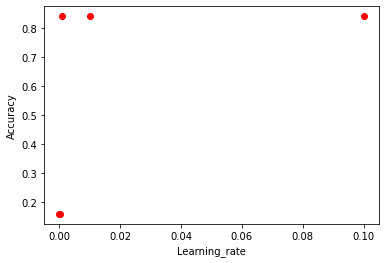

In [49]:
#Create a list of learning rates 
learning_rates=[0.1, 0.01, 0.001, 0.0001, 0.00001]
test_score = []
for lr in learning_rates:
    mlp = MLPClassifier(hidden_layer_sizes=(2), max_iter=1000,
                solver='adam', random_state=1,
                learning_rate_init=lr)

    mlp.fit(X2_train, Y2_train)
    #Predicting y for X2_test
    y_pred = MLP_Classifier.predict(X2_test)
    #Comparing the predictions against the actual observations in y_val
    cm = confusion_matrix(y_pred, Y2_test)
    #printing the acccuracy
    #print(accuracy(cm)*100)
    #print("Training set score: %f" % mlp.score(X2_train, Y2_train))
    print("Test set score: %f" % mlp.score(X2_test, Y2_test))
    test_score.append(mlp.score(X2_test, Y2_test))
plt.plot(learning_rates,test_score, 'ro')
plt.ylabel('Accuracy')
plt.xlabel('Learning_rate')
plt.show()

ii)

Training set score: 0.853723
Training set score: 0.853723


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training set score: 0.146277
Training set score: 0.146277
Training set score: 0.146277


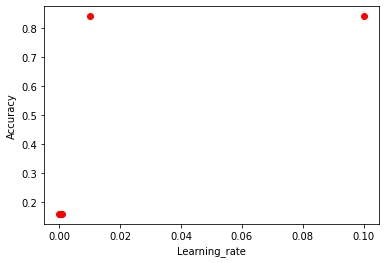

In [64]:
#Create a list of learning rates 
learning_rates=[ 0.1, 0.01, 0.001, 0.0001, 0.00001]
test_score = []
for lr in learning_rates:
    mlp = MLPClassifier(hidden_layer_sizes=(2), max_iter=200,
                solver='adam', random_state=1,
                learning_rate_init=lr)

    mlp.fit(X2_train, Y2_train)
    #Predicting y for X2_test
    y_pred = MLP_Classifier.predict(X2_test)
    #Comparing the predictions against the actual observations in y_val
    cm = confusion_matrix(y_pred, Y2_test)
    #printing the acccuracy
    #print(accuracy(cm)*100)
    print("Training set score: %f" % mlp.score(X2_train, Y2_train))
    test_score.append(mlp.score(X2_test, Y2_test))
    #print("Test set score: %f" % )
plt.plot(learning_rates,test_score, 'ro')
plt.ylabel('Accuracy')
plt.xlabel('Learning_rate')
plt.show()    

iii)

Test set score: 0.840426
Test set score: 0.840426
Test set score: 0.840426
Test set score: 0.159574
Test set score: 0.159574


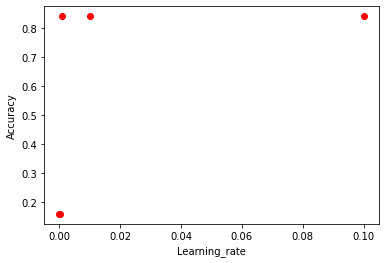

In [59]:
#Create a list of learning rates 
learning_rates=[ 0.1, 0.01, 0.001, 0.0001, 0.00001]
test_score = []
for lr in learning_rates:
    mlp = MLPClassifier(hidden_layer_sizes=(2), max_iter=1000,
                solver='adam', random_state=1,
                learning_rate_init=lr)

    mlp.fit(X2_train, Y2_train)
    #Predicting y for X2_test
    y_pred = MLP_Classifier.predict(X2_test)
    #Comparing the predictions against the actual observations in y_val
    cm = confusion_matrix(y_pred, Y2_test)
    #printing the acccuracy
    #print(accuracy(cm)*100)
    #print("Training set score: %f" % mlp.score(X2_train, Y2_train))
    test_score.append(mlp.score(X2_test, Y2_test))
    print("Test set score: %f" % mlp.score(X2_test, Y2_test))
plt.plot(learning_rates,test_score, 'ro')
plt.ylabel('Accuracy')
plt.xlabel('Learning_rate')
plt.show()    

iv)

Test set score: 0.840426
Test set score: 0.840426
Test set score: 0.159574
Test set score: 0.159574
Test set score: 0.159574


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


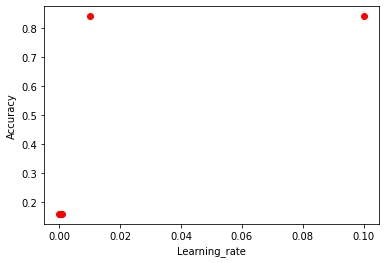

In [56]:
#Create a list of learning rates 
learning_rates=[ 0.1, 0.01, 0.001, 0.0001, 0.00001]
test_score = []
for lr in learning_rates:
    mlp = MLPClassifier(hidden_layer_sizes=(2), max_iter=100,
                solver='adam', random_state=1,
                learning_rate_init=lr)

    mlp.fit(X2_train, Y2_train)
    #Predicting y for X2_test
    y_pred = MLP_Classifier.predict(X2_test)
    #Comparing the predictions against the actual observations in y_val
    cm = confusion_matrix(y_pred, Y2_test)
    #printing the acccuracy
    #print(accuracy(cm)*100)
    #print("Training set score: %f" % mlp.score(X2_train, Y2_train))
    print("Test set score: %f" % mlp.score(X2_test, Y2_test))
    test_score.append(mlp.score(X2_test, Y2_test))
plt.plot(learning_rates,test_score, 'ro')
plt.ylabel('Accuracy')
plt.xlabel('Learning_rate')
plt.show()

v)

Test set score: 0.840426
Test set score: 0.840426
Test set score: 0.840426
Test set score: 0.159574
Test set score: 0.159574


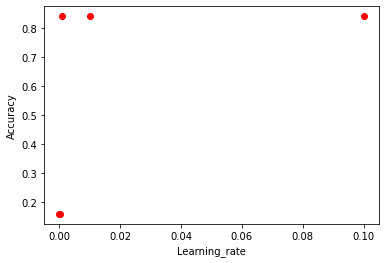

In [57]:
#Create a list of learning rates 
learning_rates=[ 0.1, 0.01, 0.001, 0.0001, 0.00001]
test_score=[]
for lr in learning_rates:
    mlp = MLPClassifier(hidden_layer_sizes=(2), max_iter=1000,
                solver='adam', random_state=1,
                learning_rate_init=lr)

    mlp.fit(X2_train, Y2_train)
    #Predicting y for X2_test
    y_pred = MLP_Classifier.predict(X2_test)
    #Comparing the predictions against the actual observations in y_val
    cm = confusion_matrix(y_pred, Y2_test)
    #printing the acccuracy
    #print(accuracy(cm)*100)
    #print("Training set score: %f" % mlp.score(X2_train, Y2_train))
    print("Test set score: %f" % mlp.score(X2_test, Y2_test))
    test_score.append(mlp.score(X2_test, Y2_test))
plt.plot(learning_rates,test_score, 'ro')
plt.ylabel('Accuracy')
plt.xlabel('Learning_rate')
plt.show()

##task(b) plot accuracy vs learning_rate for each of the architecture

In [ ]:
learning_rates = [0.1, 0.01, 0.001, 0.0001, 0.00001]
hidden_layers_nodes = ((),(2),(6),(2,3),(3,2))

best_accuracy = 0;
best_learning_rate = 0;
best_architecture = 0;
learning_rates_index = [];
accuracy_index = [];
architecture_index = [];

for lr in learning_rates:
  for node in hidden_layers_nodes:
    mlp = MLPClassifier(learning_rate= 'constant', learning_rate_init= lr, hidden_layer_sizes= node, solver='sgd')
    mlp.fit(X2_train,Y2_train)
    test_y_pred = mlp.predict(X2_test)
    accuracy = accuracy_score(Y2_test, test_y_pred)*100
    print('for hidden layer size ',node,'with learning rate ',lr, 'accuracy is : ',accuracy)
    learning_rates_index.append(lr)
    accuracy_index.append(accuracy)
    architecture_index.append(node)

    if(accuracy > best_accuracy):
      best_accuracy = accuracy
      best_learning_rate = lr
      best_architecture = node


print('best architecture: ', best_architecture, 'with best learning rate: ',best_learning_rate, 'the best acuracy is : ',best_accuracy)



for hidden layer size  () with learning rate  0.1 accuracy is :  84.04255319148936
for hidden layer size  2 with learning rate  0.1 accuracy is :  84.04255319148936
for hidden layer size  6 with learning rate  0.1 accuracy is :  84.04255319148936
for hidden layer size  (2, 3) with learning rate  0.1 accuracy is :  84.04255319148936
for hidden layer size  (3, 2) with learning rate  0.1 accuracy is :  84.04255319148936
for hidden layer size  () with learning rate  0.01 accuracy is :  84.04255319148936
for hidden layer size  2 with learning rate  0.01 accuracy is :  84.04255319148936
for hidden layer size  6 with learning rate  0.01 accuracy is :  84.04255319148936
for hidden layer size  (2, 3) with learning rate  0.01 accuracy is :  84.04255319148936
for hidden layer size  (3, 2) with learning rate  0.01 accuracy is :  84.04255319148936
for hidden layer size  () with learning rate  0.001 accuracy is :  84.04255319148936


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


for hidden layer size  2 with learning rate  0.001 accuracy is :  84.04255319148936
for hidden layer size  6 with learning rate  0.001 accuracy is :  80.85106382978722
for hidden layer size  (2, 3) with learning rate  0.001 accuracy is :  84.04255319148936
for hidden layer size  (3, 2) with learning rate  0.001 accuracy is :  84.04255319148936
for hidden layer size  () with learning rate  0.0001 accuracy is :  84.04255319148936
for hidden layer size  2 with learning rate  0.0001 accuracy is :  84.04255319148936
for hidden layer size  6 with learning rate  0.0001 accuracy is :  84.04255319148936
for hidden layer size  (2, 3) with learning rate  0.0001 accuracy is :  84.04255319148936


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


for hidden layer size  (3, 2) with learning rate  0.0001 accuracy is :  84.04255319148936
for hidden layer size  () with learning rate  1e-05 accuracy is :  78.72340425531915
for hidden layer size  2 with learning rate  1e-05 accuracy is :  15.957446808510639
for hidden layer size  6 with learning rate  1e-05 accuracy is :  80.85106382978722
for hidden layer size  (2, 3) with learning rate  1e-05 accuracy is :  15.957446808510639
for hidden layer size  (3, 2) with learning rate  1e-05 accuracy is :  84.04255319148936
best architecture:  () with best learning rate:  0.1 the best acuracy is :  84.04255319148936


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


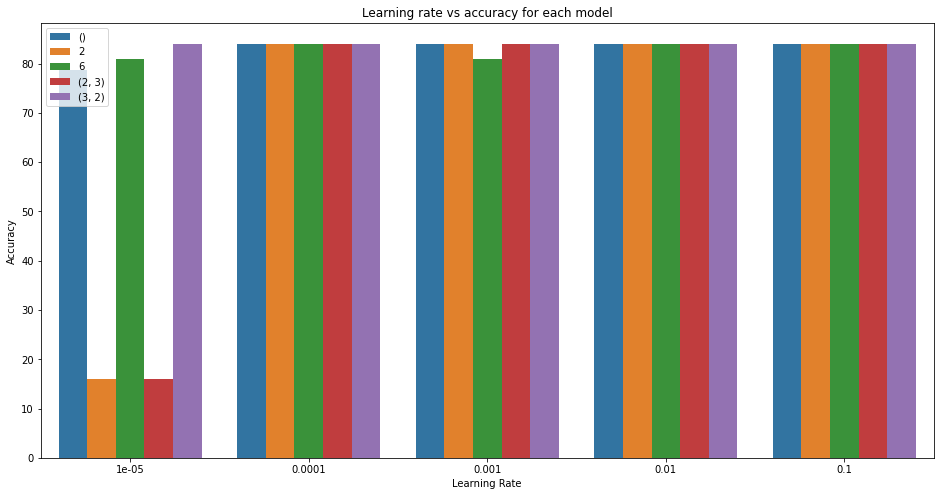

In [ ]:
import seaborn as sns
plt.figure(figsize=(16,8))
sns.barplot(x = learning_rates_index, y = accuracy_index, hue = architecture_index)

plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.title("Learning rate vs accuracy for each model")
plt.savefig('plot1.png',dpi=100)